In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import Any, List, Tuple, Set, Dict, Iterator, Iterable, Generator
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def population(y: List[float], a: float, b: float, c: float, d:float, e:float, f: float, g: float, h: float, k: float, ) -> List[float] :
    '''Defines the Lotka-Volterra model 
    for different values of y. '''
    
    l = y.size

    N = np.zeros(l)
    N[0] = a * y[0] - b*y[0]*y[1] - c*y[0]*y[2]
    N[1] = d * y[0]*y[1] - e*y[1] - f*y[1]*y[2]
    N[2] = g * y[0]*y[2] + h*y[1]*y[2] - k*y[2]

   
    return N

In [8]:
def RungeKutta(y: List[float], a: float, b: float, c: float, d: float, e:float, f: float, g: float, h: float, k: float, dt: float) -> float:
    '''Implements the RungeKutta method to 
    approximate the solution of a differential equation.'''
    
    l = y.size;
    
    c1 = np.zeros(l)
    c2 = np.zeros(l)
    c3 = np.zeros(l)
    c4 = np.zeros(l)
    c1 = population(y, a, b, c, d, e, f, g, h, k)
    c2 = y + dt*c1/2.0;
    c2 = population(c2, a, b, c, d, e, f, g, h, k)
    c3 = y + dt*c2/2.0;
    c3 = population(c3, a, b, c, d, e, f, g, h, k)
    c4 = y + dt*c3;
    c4 = population(c4, a, b, c, d, e, f, g, h, k)
    result = y + dt*(c1 + 2*(c2 + c3) + c4)/6
    
    return result 

In [21]:
def solve_pop(a: float, b: float, c: float, d: float, e:float, f: float, g: float, h: float, k: float, initial_1: float, initial_2: float, initial_3: float):
    '''Shows plots from various perspectives for different 
    constants in the Lotka-Volterra model and different 
    initial values of the differential equations.'''
    
    n = 10000
    
    y1 = np.zeros(n + 1)
    y2 = np.zeros(n + 1)
    y3 = np.zeros(n + 1)
    y = np.zeros(3)
    
    dt = 0.005
    
    y1[0] = y[0] = initial_1;
    y2[0] = y[1] = initial_2;
    y3[0] = y[2] = initial_3;
    
    time = [0]
    
    for i in range(0, n):
        t = dt * i
        y = RungeKutta(y, a, b, c, d, e, f, g, h, k, dt)
        
        time.append(t)
        
        y1[i + 1] = y[0]
        y2[i + 1] = y[1]
        y3[i + 1] = y[2]
    
    
    fig, ax = plt.subplots(nrows = 2, ncols = 2, squeeze = False, figsize = (15, 6))
    
    ax[0, 0].plot(time, y1, label = "Gazelles")
    ax[0, 0].plot(time, y2, label = "Crocodiles")
    ax[0, 0].plot(time, y3, label = "Lions")
    ax[0, 0].set_xlabel('time')
    ax[0, 0].set_ylabel('population')
    ax[0, 0].grid()
    ax[0, 0].legend()
    ax[0, 1].plot(y1, y2, '.')
    ax[0, 1].set_xlabel('Gazelle')
    ax[0, 1].set_ylabel('Crocodile')
    ax[0, 1].grid()
    ax[1, 0].plot(y2, y3, '.')
    ax[1, 0].set_xlabel('Crocodile')
    ax[1, 0].set_ylabel('Lion')
    ax[1, 0].grid()
    ax[1, 1].plot(y3, y1, '.')
    ax[1, 1].set_xlabel('Lion')
    ax[1, 1].set_ylabel('Gazelle')
    ax[1, 1].grid()
    
    
    plt.show()    

In [56]:
def solve_pop3d(a: float, b: float, c: float, d: float, e:float, f: float, g: float, h: float, k: float, initial_1: float, initial_2: float, initial_3: float):
    '''Shows plots from various perspectives for different 
    constants in the Lotka-Volterra model and different 
    initial values of the differential equations.'''
    
    n = 10000
    
    y1 = np.zeros(n + 1)
    y2 = np.zeros(n + 1)
    y3 = np.zeros(n + 1)
    y = np.zeros(3)
    
    dt = 0.005
    
    y1[0] = y[0] = initial_1;
    y2[0] = y[1] = initial_2;
    y3[0] = y[2] = initial_3;
    
    time = [0]
    
    for i in range(0, n):
        t = dt * i
        y = RungeKutta(y, a, b, c, d, e, f, g, h, k, dt)
        
        time.append(t)
        
        y1[i + 1] = y[0]
        y2[i + 1] = y[1]
        y3[i + 1] = y[2]
    
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(y1, y2, y3)
    ax.set_xlabel('Gazelle')
    ax.set_ylabel('Crocodile')
    ax.set_zlabel('Lion', rotation=90)
    ax.set_title('Three species')
    
    plt.tight_layout()
    plt.show()   

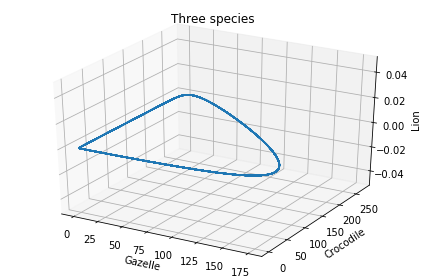

In [57]:
solve_pop3d(10, 0.2, 0.2, 0.2, 2, 0.2, 0.1, 0.2, 8, 50, 2, 0)

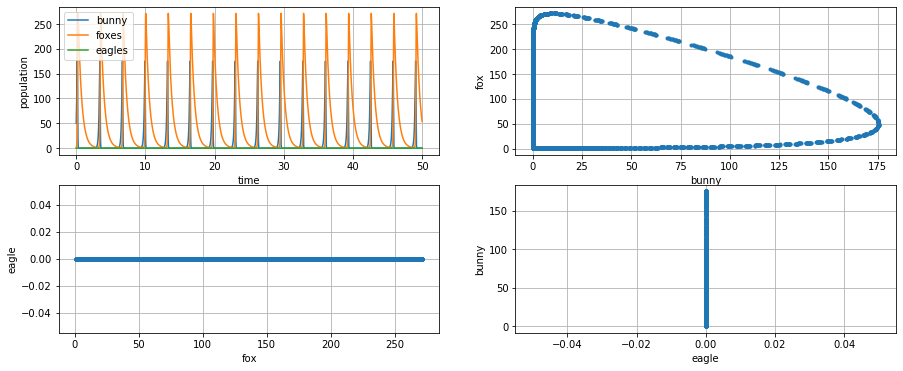

In [12]:
solve_pop(10, 0.2, 0.2, 0.2, 2, 0.2, 0.1, 0.2, 8, 50, 2, 0)

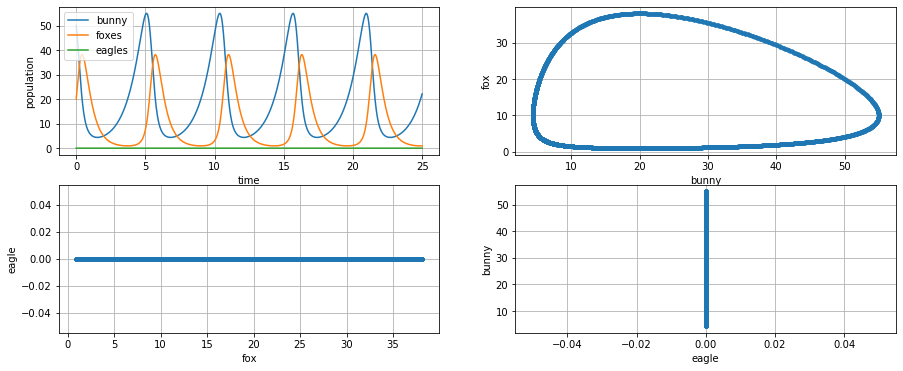

In [12]:
solve_pop(1, 0.1, 0, 0.1, 2, 0, 0, 0, 0, 50, 20, 0)

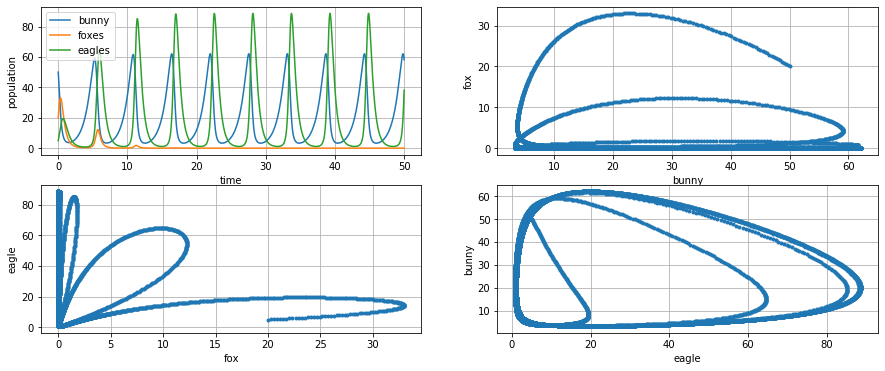

In [17]:
solve_pop(1, 0.1, 0.05, 0.1, 2, 0.02, 0.1, 0.05, 2, 50, 20, 5)

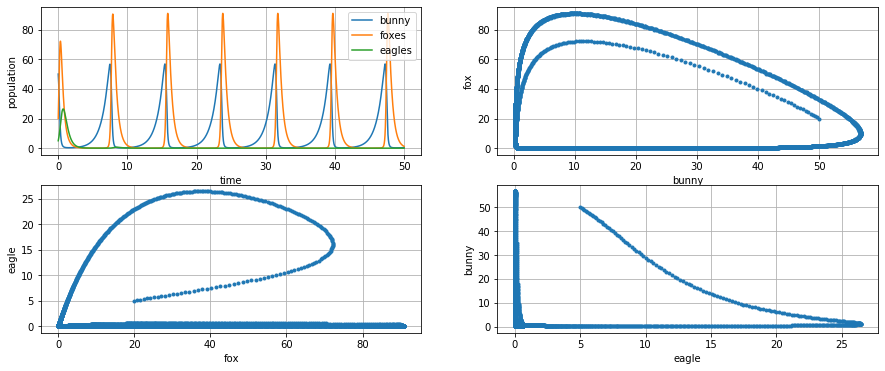

In [18]:
solve_pop(1, 0.1, 0.05, 0.2, 2, 0.02, 0.1, 0.05, 2, 50, 20, 5)